In [1]:
#!pip install -U spacy
#!pip install -U spacy-lookups-data
#!python -m spacy download en_core_web_sm
#!python -m spacy download en_core_web_md
#!python -m spacy download en_core_web_lg

In [2]:
import pandas as pd
import numpy as np
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

#### General Feature Extraction
- File loading
- Word counts
- Characters count
- Average characters per word
- Stop words count
- Count #HashTags and @Mentions
- If numeric digits are present in twitts
- Upper case word counts

#### Preprocessing and Cleaning
- Lower case
- Contraction to Expansion
- Emails removal and counts
- URLs removal and counts
- Removal of `RT`
- Removal of Special Characters
- Removal of multiple spaces
- Removal of HTML tags
- Removal of accented characters
- Removal of Stop Words
- Conversion into base form of words
- Common Occuring words Removal
- Rare Occuring words Removal
- Word Cloud
- Spelling Correction
- Tokenization
- Lemmatization
- Detecting Entities using NER
- Noun Detection
- Language Detection
- Sentence Translation
- Using Inbuilt `Sentiment Classifier`

#### Advanced Text Processing and Feature Extraction
- N-Gram, Bi-Gram etc
- Bag of Words (BoW)
- Term Frequency Calculation `TF`
- Inverse Document Frequency `IDF`
- `TFIDF` Term Frequency - Inverse Document Frequency
- Word Embedding `Word2Vec` using SpaCy

#### Machine Learning Models for Text Classification
- SGDClassifier
- LogisticRegression
- LogisticRegressionCV
- LinearSVC
- RandomForestClassifier

In [3]:
df = pd.read_csv('twitter16m.csv', encoding = 'latin1', header = None)

In [4]:
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
df=df[[5,0]]
df.columns = ['twitts', 'sentiment']
df.head(5)

,twitts,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [6]:
df['sentiment'].value_counts()

4    800000
0    800000
Name: sentiment, dtype: int64

In [7]:
sent_map = {0: 'negative', 4: 'positive'}

# Word Counts

In [8]:
df['word_counts'] = df['twitts'].apply(lambda x: len(str(x).split()))
df.head()

,twitts,sentiment,word_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19
1,is upset that he can't update his Facebook by ...,0,21
2,@Kenichan I dived many times for the ball. Man...,0,18
3,my whole body feels itchy and like its on fire,0,10
4,"@nationwideclass no, it's not behaving at all....",0,21


# Characters Count 

In [9]:
df['char_counts'] = df['twitts'].apply(lambda x: len(x))
df.head()

,twitts,sentiment,word_counts,char_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115
1,is upset that he can't update his Facebook by ...,0,21,111
2,@Kenichan I dived many times for the ball. Man...,0,18,89
3,my whole body feels itchy and like its on fire,0,10,47
4,"@nationwideclass no, it's not behaving at all....",0,21,111


# Average Word Length

In [10]:
def get_avg_word_len(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len = word_len + len(word)
    return word_len/len(words) # != len(x)/len(words)

In [11]:
df['avg_word_len'] = df['twitts'].apply(lambda x: get_avg_word_len(x))

In [12]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444
3,my whole body feels itchy and like its on fire,0,10,47,3.700000
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714


# Stop Words Count

In [13]:
print(STOP_WORDS)

{'except', 'too', 'has', 'very', 'less', 'thereupon', 'former', 'have', 'n‘t', 'everywhere', '‘d', 'had', 'until', 'only', 'whose', 'everyone', 'might', 'whom', 'someone', 'name', 'with', 'everything', 'can', 'him', 'their', "'m", 'be', 'me', 'already', 'they', 'hereafter', 'the', 'nine', 'most', 'should', 'ourselves', 'because', 'elsewhere', 'themselves', 'herself', 'us', 'just', 'many', 'onto', 'bottom', 'yours', 'nothing', 'for', 'really', 'while', 'after', 'before', 'so', 'whence', '’ll', 'via', 'full', 'sometimes', 'anywhere', 'are', 'almost', 'does', 'always', "n't", 'call', 'as', 'during', 'he', 'doing', 'first', 'five', 'regarding', 'am', 'why', 'some', '‘ve', 'was', 'himself', 'herein', 'top', 'various', '‘re', 'here', 'behind', 'this', 'i', 'take', 'ten', 'noone', 'something', 'however', 'yet', 'quite', 'amount', 'nowhere', 'its', 'below', 'namely', 'few', 'yourself', 'move', 'to', 'under', 'if', 'afterwards', 'well', 'hereupon', 'hence', 'besides', 'done', "'ll", 'would', 'w

In [14]:
df['stop_words_len'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t in STOP_WORDS]))

In [15]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10


# Count #HashTags and @Mentions

In [16]:
df['hashtags_count'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.startswith('#')]))
df['mentions_count'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.startswith('@')]))

In [17]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,0,1
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1


# if numeric digits are present in twitts

In [18]:
df['numerics_count'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.isdigit()]))
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,0,1,0
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,0,1,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1,0


# UpperCase count words

In [19]:
df['upper_counts'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.isupper() and len(x)>3]))
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,0,1,0,1
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,0,1,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1,0,1


In [20]:
df.loc[96]['twitts']

"so rylee,grace...wana go steve's party or not?? SADLY SINCE ITS EASTER I WNT B ABLE 2 DO MUCH  BUT OHH WELL....."

# Preprocessing and Cleaning

## Lower case conversion

In [21]:
df['twitts'] = df['twitts'].apply(lambda x: x.lower())
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.052632,4,0,1,0,1
1,is upset that he can't update his facebook by ...,0,21,111,4.285714,9,0,0,0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1,0,1


## Contraction to Expansion 

In [22]:
x = "i don't know what you want, can't, he'll, i'd"

contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how does",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
" u ": " you ",
" ur ": " your ",
" n ": " and "}

In [23]:
def cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [24]:
cont_to_exp(x)

'i do not know what you want, cannot, he will, i would'

In [25]:
%%time
df['twitts'] = df['twitts'].apply(lambda x: cont_to_exp(x))

Wall time: 1min 46s


In [26]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.052632,4,0,1,0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0
4,"@nationwideclass no, it is not behaving at all...",0,21,111,4.285714,10,0,1,0,1


## Count and Remove Emails

In [27]:
import re

In [28]:
df['emails'] = df['twitts'].apply(lambda x: re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', x))

In [29]:
df['emails_count'] = df['emails'].apply(lambda x: len(x))
df[df['emails_count']>0].head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count
4054,i want a new laptop. hp tx2000 is the bomb. :...,0,20,103,4.150000,6,0,0,0,4,[gabbehhramos@yahoo.com],1
7917,who stole elledell@gmail.com?,0,3,31,9.000000,1,0,0,0,0,[elledell@gmail.com],1
8496,@alexistehpom really? did you send out all th...,0,20,130,5.500000,11,0,1,0,0,[missataari@gmail.com],1
10290,@laureystack awh...that is kinda sad lol add ...,0,8,76,8.500000,0,0,1,0,0,[hello.kitty.65@hotmail.com],1
16413,"@jilliancyork got 2 bottom of it, human error...",0,21,137,5.428571,7,0,1,1,0,[press@linkedin.com],1


In [30]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', '', x))
df[df['emails_count']>0].head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count
4054,i want a new laptop. hp tx2000 is the bomb. :...,0,20,103,4.150000,6,0,0,0,4,[gabbehhramos@yahoo.com],1
7917,who stole ?,0,3,31,9.000000,1,0,0,0,0,[elledell@gmail.com],1
8496,@alexistehpom really? did you send out all th...,0,20,130,5.500000,11,0,1,0,0,[missataari@gmail.com],1
10290,@laureystack awh...that is kinda sad lol add ...,0,8,76,8.500000,0,0,1,0,0,[hello.kitty.65@hotmail.com],1
16413,"@jilliancyork got 2 bottom of it, human error...",0,21,137,5.428571,7,0,1,1,0,[press@linkedin.com],1


## Count URLs and Remove it

In [31]:
df['urls_flag'] = df['twitts'].apply(lambda x: len(re.findall(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x)))
df['twitts'] = df['twitts'].apply(lambda x: re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '', x))
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,urls_flag
0,"@switchfoot - awww, that is a bummer. you sh...",0,19,115,5.052632,4,0,1,0,1,[],0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,"@nationwideclass no, it is not behaving at all...",0,21,111,4.285714,10,0,1,0,1,[],0,0


## Remove RT

In [32]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub('RT', "", x))

## Special Chars removal or punctuation removal

In [33]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub('[^A-Z a-z 0-9-]+', '', x))

## Remove multiple spaces "hi   hello    "

In [34]:
df['twitts'] = df['twitts'].apply(lambda x: " ".join(x.split()))

In [35]:
df.head(2)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,urls_flag
0,switchfoot - awww that is a bummer you shoulda...,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0,0


## Remove HTML tags

In [36]:
from bs4 import BeautifulSoup

In [37]:
%%time
df['twitts'] = df['twitts'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text())

Wall time: 13min 45s


## Remove Accented Chars

In [38]:
import unicodedata

In [39]:
def remove_accented_chars(x):
    x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return x

In [40]:
x = 'Áccěntěd těxt'
remove_accented_chars(x)

'Accented text'

# SpaCy and NLP

## Remove Stop Words 

In [42]:
import spacy

In [43]:
df['twitts'] = df['twitts'].apply(lambda x: " ".join([t for t in x.split() if t not in STOP_WORDS]))
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,urls_flag
0,switchfoot - awww bummer shoulda got david car...,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,upset update facebook texting cry result schoo...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,kenichan dived times ball managed save 50 rest...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,body feels itchy like fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass behaving mad,0,21,111,4.285714,10,0,1,0,1,[],0,0


## Convert into base or root form of word

In [44]:
nlp = spacy.load('en_core_web_sm')

In [45]:
x = 'kenichan dived times ball managed save 50 rest'
def make_to_base(x):
    x_list = []
    doc = nlp(x)
    
    for token in doc:
        lemma = str(token.lemma_)
        if lemma == '-PRON-' or lemma == 'be':
            lemma = token.text
        x_list.append(lemma)
    print(" ".join(x_list))
        

In [46]:
make_to_base(x)

kenichan dive time ball manage save 50 rest


## Common words removal 

In [47]:
' '.join(df.head()['twitts'])

'switchfoot - awww bummer shoulda got david carr day d upset update facebook texting cry result school today blah kenichan dived times ball managed save 50 rest bounds body feels itchy like fire nationwideclass behaving mad'

In [48]:
text = ' '.join(df['twitts'])
text = text.split()
freq_comm = pd.Series(text).value_counts()
f20 = freq_comm[:20]
f20

good      89366
day       82299
like      77735
-         69662
today     64512
going     64078
love      63421
work      62804
got       60749
time      56081
lol       55094
know      51172
im        50147
want      42070
new       41995
think     41040
night     41029
amp       40616
thanks    39311
home      39168
dtype: int64

In [49]:
df['twitts'] = df['twitts'].apply(lambda x: " ".join([t for t in x.split() if t not in f20]))

## Rare words removal

In [50]:
rare20 = freq_comm[-20:]
rare20

pooranip              1
boxplots              1
vainly                1
markjabbal            1
sirwhats              1
mjthis                1
sinofeden             1
ntrebri               1
worthbak              1
wilddivairis          1
ismokecrack           1
wasspeechlessloved    1
insurpriseno          1
heatherbbyyy          1
mlorelle              1
2nitex                1
pahyou                1
tongueit              1
manik                 1
budpa                 1
dtype: int64

In [52]:
rare = freq_comm[freq_comm.values == 1]
rare

basementquot               1
supermanforever            1
mymap                      1
alicepenguin               1
miifreakshow               1
spagampampburgers          1
acemas21x2                 1
scottleighton              1
astrokids                  1
birminghamengland          1
fodalweb                   1
highfiveandcody            1
lifeboatcoastguard         1
oversaving                 1
sdaydatesaroundtheworld    1
cushes                     1
sapinya                    1
quatromesas                1
jghuman                    1
design-books               1
myton                      1
africa-brought             1
ctrl-j                     1
hiiiiyaaaaa                1
downloadingusing           1
paign                      1
mxjxharris                 1
grrrrbip                   1
rianarockaholic            1
michaelsheens              1
                          ..
againoorrr                 1
juanerr                    1
gps-trace                  1
andrewsteeley 

In [53]:
df['twitts'] = df['twitts'].apply(lambda x: ' '.join([t for t in x.split() if t not in rare20]))

In [54]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,urls_flag
0,switchfoot awww bummer shoulda david carr d,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,upset update facebook texting cry result schoo...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,kenichan dived times ball managed save 50 rest...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,body feels itchy fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass behaving mad,0,21,111,4.285714,10,0,1,0,1,[],0,0


## Word Cloud Visualization 

In [55]:
# !pip install wordcloud

In [56]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
x = ' '.join(text[:20000])
len(text)

10837079

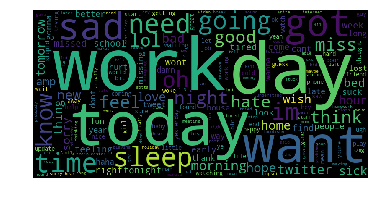

In [58]:
wc = WordCloud(width = 800, height=400).generate(x)
plt.imshow(wc)
plt.axis('off')
plt.show()

## Spelling Correction

In [59]:
# !pip install -U textblob
# !python -m textblob.download_corpora

Finished.


C:\Users\SANDESH\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:17: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, defaultdict
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\SANDESH\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SANDESH\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SANDESH\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\SANDESH\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\SANDESH\AppData\Ro

In [60]:
from textblob import TextBlob

In [61]:
x = 'tanks forr waching this vidio carri'
x = TextBlob(x).correct()
x

TextBlob("tanks for watching this video carry")

## Tokenization

In [62]:
x = 'thanks#watching this video. please like it'

In [63]:
TextBlob(x).words

WordList(['thanks', 'watching', 'this', 'video', 'please', 'like', 'it'])

In [64]:
doc = nlp(x)
for token in doc:
    print(token)

thanks#watching
this
video
.
please
like
it


## Lemmatization

In [65]:
x = 'runs run running ran'

In [66]:
from textblob import Word
for token in x.split():
    print(Word(token).lemmatize())

run
run
running
ran


In [67]:
doc = nlp(x)
for token in doc:
    print(token.lemma_)

run
run
run
run


##  Detect Entities using NER of SpaCy

In [68]:
x = "Breaking News: Donald Trump, the president of the USA is looking to sign a deal to mine the moon"

In [69]:
doc = nlp(x)
for ent in doc.ents:
    print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

Donald Trump - PERSON - People, including fictional
USA - GPE - Countries, cities, states


In [70]:
from spacy import displacy
displacy.render(doc, style = 'ent')

## Detecting Nouns

In [71]:
for noun in doc.noun_chunks:
    print(noun)

Breaking News
Donald Trump
the president
the USA
a deal
the moon


## Translation and Language Detection 

Language Code: https://www.loc.gov/standards/iso639-2/php/code_list.php

In [72]:
tb = TextBlob(x)

In [73]:
tb.detect_language()

'en'

In [74]:
tb.translate(to='hi')

TextBlob("ब्रेकिंग न्यूज़: डोनाल्ड ट्रम्प, संयुक्त राज्य अमेरिका के राष्ट्रपति चांद को खदान करने के लिए एक समझौते पर हस्ताक्षर करना चाहते हैं")

## Use inbuilt sentiment classifier 

In [75]:
from textblob.sentiments import NaiveBayesAnalyzer

In [76]:
x = 'we all stands together to fight with corona virus. we will win together'
tb = TextBlob(x, analyzer=NaiveBayesAnalyzer())
tb.sentiment

Sentiment(classification='pos', p_pos=0.8259779151942094, p_neg=0.17402208480578962)

In [79]:
x = 'fuccking bad corona killing peoples'
tb = TextBlob(x, analyzer=NaiveBayesAnalyzer())
tb.sentiment

Sentiment(classification='neg', p_pos=0.38316359368492864, p_neg=0.616836406315072)

# Advanced Text Processing

## N-Grams

In [85]:
x = 'thanks for watching this movie'
tb = TextBlob(x)
tb.ngrams(1)

[WordList(['thanks']),
 WordList(['for']),
 WordList(['watching']),
 WordList(['this']),
 WordList(['movie'])]

## Bag of Words BoW

In [86]:
x = ['this is first sentence this is', 'this is second', 'this is last']
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1,1))
text_counts = cv.fit_transform(x)
text_counts.toarray()

array([[1, 2, 0, 0, 1, 2],
       [0, 1, 0, 1, 0, 1],
       [0, 1, 1, 0, 0, 1]], dtype=int64)

In [87]:
cv.get_feature_names()

['first', 'is', 'last', 'second', 'sentence', 'this']

In [88]:
bow = pd.DataFrame(text_counts.toarray(), columns = cv.get_feature_names())
bow

,first,is,last,second,sentence,this
0,1,2,0,0,1,2
1,0,1,0,1,0,1
2,0,1,1,0,0,1
